In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [48]:
files = [file for file in os.listdir('./oneminutesfeb22')]

febrero = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesfeb22/'+file)
  febrero = pd.concat([febrero, df])

In [49]:
febrero.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X,31786,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2022-02-10 00:00:00,190967,0,10.84,45.2,751.1523,NaN,NaN
4,2022-02-10 00:01:00,190968,0,10.84,45.23,751.1487,NaN,NaN


# Arreglando la tabla

In [50]:
febrero.drop(febrero.index[0:3], axis = 0, inplace = True)
febrero.drop(['OneMinute', '31786'],axis='columns', inplace=True)
febrero

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
3,2022-02-10 00:00:00,190967,0,10.84,45.2,751.1523
4,2022-02-10 00:01:00,190968,0,10.84,45.23,751.1487
5,2022-02-10 00:02:00,190969,0,10.84,45.27,751.1448
6,2022-02-10 00:03:00,190970,0,10.81,45.41,751.1346
7,2022-02-10 00:04:00,190971,0,10.78,45.39,751.1181
...,...,...,...,...,...,...
1438,2022-02-09 23:55:00,190962,0,10.95,44.99,751.1326
1439,2022-02-09 23:56:00,190963,0,10.91,45.13,751.1363
1440,2022-02-09 23:57:00,190964,0,10.9,45.09,751.1478
1441,2022-02-09 23:58:00,190965,0,10.88,45.18,751.1477


# Convirtiendolo a float

In [51]:
febrero = febrero.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [52]:
prom_rad = febrero['CR1000X'].mean()
prom_Tamb = febrero['8543.1'].mean()
prom_atm = febrero['CPU:Est_meteo1.CR1X'].mean()
proms_feb = [prom_rad, prom_Tamb,prom_atm]
febrero.describe()

,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
count,36000.00000,36000.000000,36000.000000,36000.000000,36000.000000
mean,197907.30000,235.785890,14.844592,42.847537,753.044959
std,12285.06148,339.305892,3.971113,18.929176,2.183129
min,178007.00000,0.000000,6.603000,5.227000,747.144300
25%,187006.75000,0.000000,11.850000,29.117500,751.421175
50%,196006.50000,0.000000,14.500000,42.400000,753.392900
75%,209326.25000,450.325000,17.470000,54.010000,754.737875
max,218326.00000,1202.000000,25.650000,100.000000,757.253000


# Exportando nuevo archivo

In [53]:
febrero.to_csv('febrero22.csv', index=False)

# Radiacion Febrero

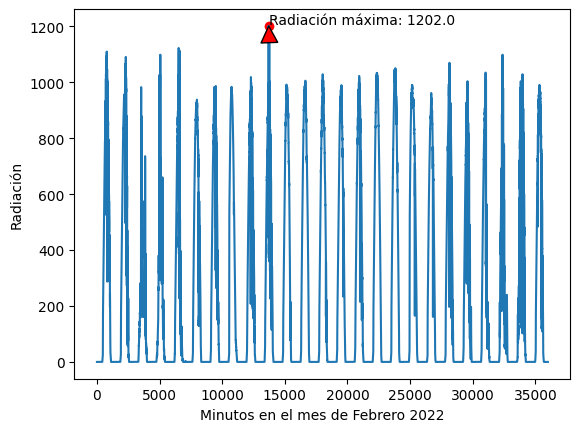

In [54]:
df = pd.read_csv("febrero22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de Febrero 2022')
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente Febrero

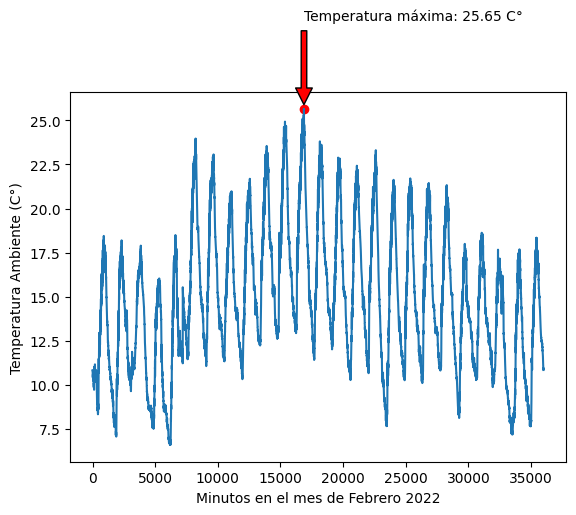

In [55]:
df = pd.read_csv("febrero22.csv")

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de Febrero 2022')
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion Febrero

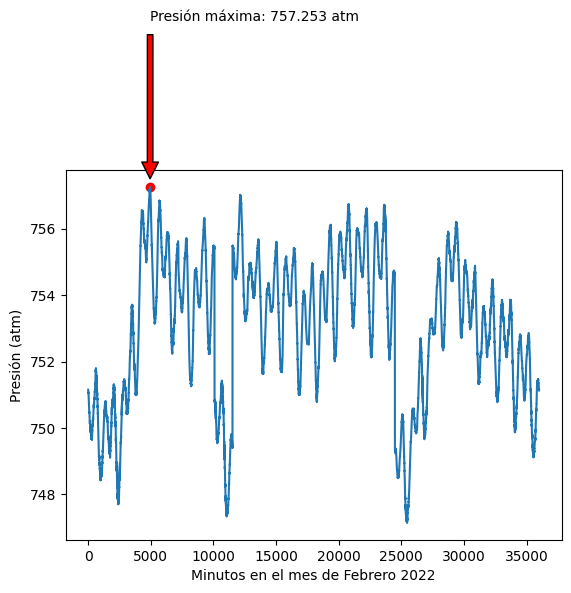

In [56]:
df = pd.read_csv("febrero22.csv")

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de Febrero 2022')
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()